<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.4: Regularisation

In [5]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [6]:
## Load the Diabetes dataset
data = datasets.load_diabetes()
data
# Load the diabetes dataset from sklearn

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
# Description

In [8]:
# Predictors
X = pd.DataFrame(data.data, columns = data.feature_names)

In [9]:
# Target
y = data.target

#### 1.2 Create a Base Model Using Linear Regression

In [10]:
# Create Model
lr = LinearRegression()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
# Fit
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
# Score
lr.score(X_test, y_test) #43% deter

0.43845698491295737

In [14]:
# Check Coeffiricent
lr.coef_

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

In [15]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [16]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

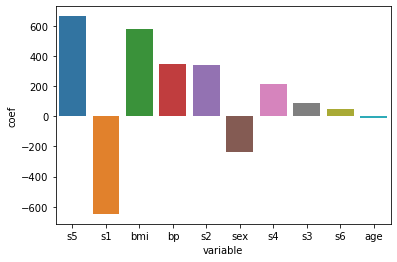

In [17]:
# Plot Coefficients
view_coeff(X, lr)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [77]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

##### 1.3.2 Visual Representation of Coefficient of Ridge Model

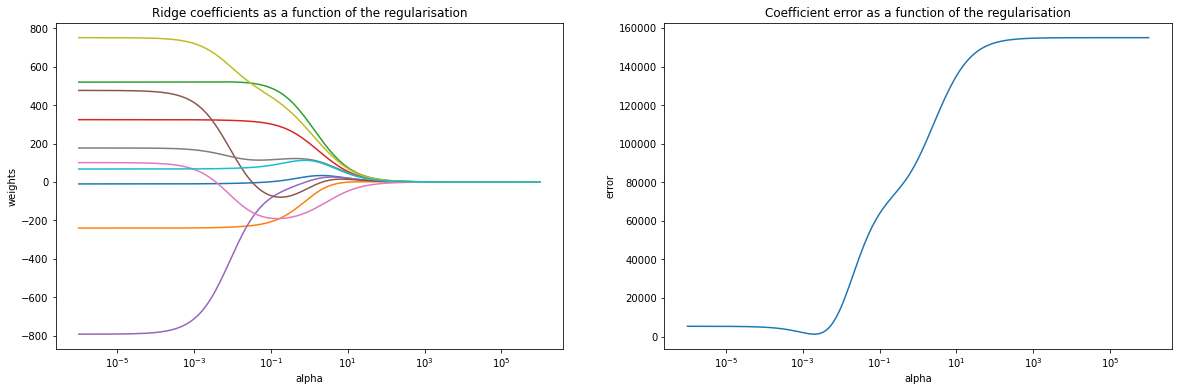

In [19]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [79]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_test, y_test))

Alpha: 1e-06
Score: 0.43120400304873996


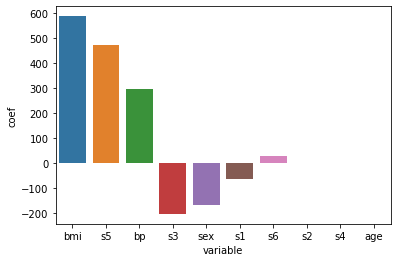

In [69]:
view_coeff(X, optimal_ridge)

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [53]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters

# keep track of the intermediate results for coefficients and errors


# create a range of alphas to calculate

# Train the model with different regularisation strengths


In [54]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
las = Lasso()

# keep track of the intermediate results for coefficients and errors
las_coefs = []
las_errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    las.set_params(alpha = a)
    las.fit(X, y)
    las_coefs.append(las.coef_)
    las_errors.append(mean_squared_error(las.coef_, lr.coef_))

In [55]:
len(las_coefs)

200

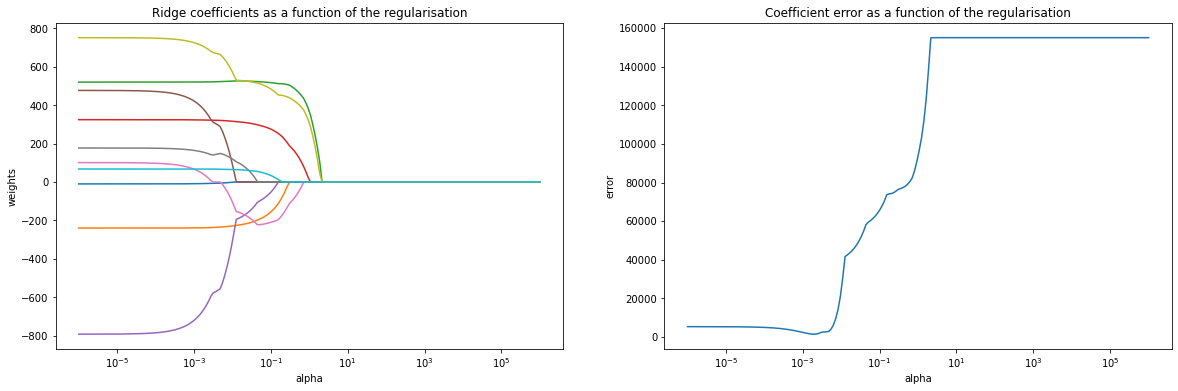

In [56]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, las_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, las_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.2 Visual Representation of Coefficient of Lasso Model

Hint: Same as Ridge

##### 1.4.3. [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [80]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X_train, y_train)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_test, y_test))

Alpha: 1e-06
Score: 0.4311445032124369


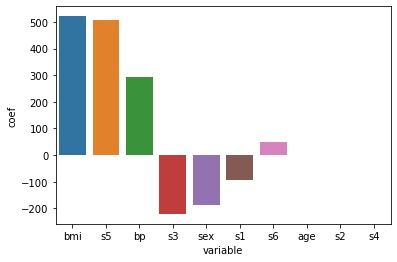

In [58]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [82]:
# Build the ridge and lasso using optimal alpha
r = Ridge(alpha=optimal_ridge.alpha_)
l = Lasso(alpha=optimal_lasso.alpha_)
# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridgeoptimal_lasso
print(r.fit(X_train,y_train))
print(l.fit(X_train,y_train))

Ridge(alpha=1e-06)
Lasso(alpha=1e-06)


In [83]:
# model residuals:
ridge_reside=y_train - r.predict(X_train)
lasso_reside=y_train - l.predict(X_train)

In [84]:
print(lasso_reside)

[ 5.99921531e-03  1.09239967e-02  1.60688694e-02  1.41955126e-02
 -4.95628851e-03  1.51088119e-02 -1.50771303e-02 -2.66903578e-03
  1.67978832e-02  8.32468356e-03  1.52749735e-02 -1.50021490e-03
  9.63566570e-03 -4.85633677e-03  8.68907966e-03  5.96412480e-04
  2.30196306e-02 -2.60388328e-02  8.90658202e-03 -9.60283611e-03
  2.78828548e-03  2.44534710e-03  5.07243893e-03  2.10751350e-02
  1.98614060e-02  3.49456577e-02 -2.24582052e-02  6.51950052e-03
  2.95711149e-03  2.75961863e-02 -6.12874956e-03  1.10265327e-02
 -1.23349519e-02  1.33089872e-02 -2.30726838e-02  4.82194546e-03
 -1.08251230e-02  1.38287624e-02  1.67369191e-02  1.12805315e-02
 -2.08600947e-02 -1.37723728e-02  1.10047879e-02  1.64613988e-02
  5.28900237e-03  1.65785675e-02 -1.42997757e-03 -2.41955309e-03
 -7.62078405e-03  1.71000816e-02 -4.87793338e-04  1.44190928e-02
  2.81095689e-02  1.44978779e-02  8.97905386e-03  7.48972392e-03
  3.95433837e-02  1.42920555e-02 -8.79802226e-03 -1.17033662e-03
 -1.11992575e-02  4.54156

/Users/gdine/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


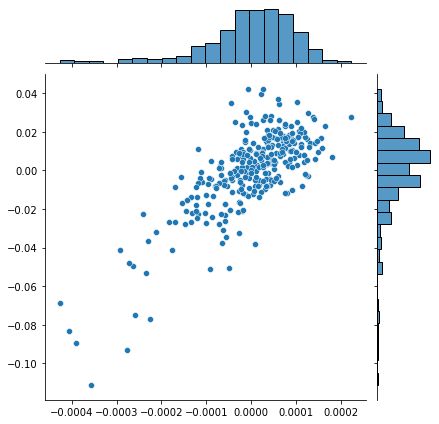

In [85]:
# Jointplot
sns.jointplot(ridge_reside,lasso_reside)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



